# Problem2

$$
\\it's\;been\;decided\;to\;tune\;on\;[0, \pi]\;and\;miror\;the\;next\;part\;to\;make\;symmetry
$$

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import differential_evolution, NonlinearConstraint, Bounds, minimize, fmin, rosen 

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

In [3]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.trapmf(x_in, [X[0], X[1], X[2], X[3]])
    x_md = fuzz.trapmf(x_in, [X[4], X[5], X[6], X[7]])
    x_hi = fuzz.trapmf(x_in, [X[8], X[9], X[10], X[11]])
   
    y_lo = fuzz.trapmf(y_out, [X[12], X[13], X[14], X[15]])
    y_hi = fuzz.trapmf(y_out, [X[16], X[17], X[18], X[19]])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmin(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y
# # Generate fuzzy membership functions
# x_lo = fuzz.trapmf(x_in, [0, 0, 0.1, 2])
# x_md = fuzz.trapmf(x_in, [1, np.pi/2, np.pi/2, 3])
# x_hi = fuzz.trapmf(x_in, [2, 2, 3, np.pi])


In [6]:
sin([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1], 1)

0.49499999999999933

In [7]:
np.sin(1)

0.8414709848078965

In [8]:
def Error(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4)])
    return np.linalg.norm(v, 2)

In [9]:
Error([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.9, 2.1, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.7, 0.8, 1, 1])

0.5385113621733931

In [12]:
def ros(X):
    return 1+ X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2

In [13]:
ros([1,2,3,4])

31

In [11]:
#constrains & Bounds
bounds = [(0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi),
          (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), 
         (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

def c_x_lo_1(x):
    return np.array(x[1]-x[0])
c1 = NonlinearConstraint(c_x_lo_1, 0, np.inf)
def c_x_lo_2(x):
    return np.array(x[2]-x[1])
c2 = NonlinearConstraint(c_x_lo_2, 0, np.inf)
def c_x_lo_3(x):
    return np.array(x[3]-x[2])
c3 = NonlinearConstraint(c_x_lo_3, 0, np.inf)
def c_x_md_1(x):
    return np.array(x[5]-x[4])
c4 = NonlinearConstraint(c_x_md_1, 0, np.inf)
def c_x_md_2(x):
    return np.array(x[6]-x[5])
c5 = NonlinearConstraint(c_x_md_2, 0, np.inf)
def c_x_md_3(x):
    return np.array(x[7]-x[6])
c6 = NonlinearConstraint(c_x_md_3, 0, np.inf)
def c_x_hi_1(x):
    return np.array(x[9]-x[8])
c7 = NonlinearConstraint(c_x_hi_1, 0, np.inf)
def c_x_hi_2(x):
    return np.array(x[10]-x[9])
c8 = NonlinearConstraint(c_x_hi_2, 0, np.inf)
def c_x_hi_3(x):
    return np.array(x[11]-x[10])
c9 = NonlinearConstraint(c_x_hi_3, 0, np.inf)
def c_y_lo_1(x):
    return np.array(x[13]-x[12])
c10 = NonlinearConstraint(c_y_lo_1, 0, np.inf)
def c_y_lo_2(x):
    return np.array(x[14]-x[13])
c11 = NonlinearConstraint(c_y_lo_2, 0, np.inf)
def c_y_lo_3(x):
    return np.array(x[15]-x[14])
c12 = NonlinearConstraint(c_y_lo_3, 0, np.inf)
def c_y_hi_1(x):
    return np.array(x[17]-x[16])
c13 = NonlinearConstraint(c_y_hi_1, 0, np.inf)
def c_y_hi_2(x):
    return np.array(x[18]-x[17])
c14 = NonlinearConstraint(c_y_hi_2, 0, np.inf)
def c_y_hi_3(x):
    return np.array(x[19]-x[18])
c15 = NonlinearConstraint(c_y_hi_3, 0, np.inf)
cs = (c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15)

In [12]:

xinitial = [0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1]

result = differential_evolution(Error, bounds, constraints=(cs), x0 = xinitial)
result.x, result.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


(array([0.08904881, 0.44047543, 2.35106525, 2.95442739, 0.6686553 ,
        1.05513277, 2.1819393 , 2.35309807, 0.88649763, 2.21930116,
        2.50064688, 3.07227184, 0.38874047, 0.46606823, 0.5605892 ,
        0.98997011, 0.61821384, 0.67414819, 0.87341412, 0.96593834]),
 0.26121162599949427)

In [15]:
sin(result.x, 2)

0.7551996188768102

In [16]:
np.sin(2)

0.9092974268256817

AttributeError: 'AxesSubplot' object has no attribute 'show'

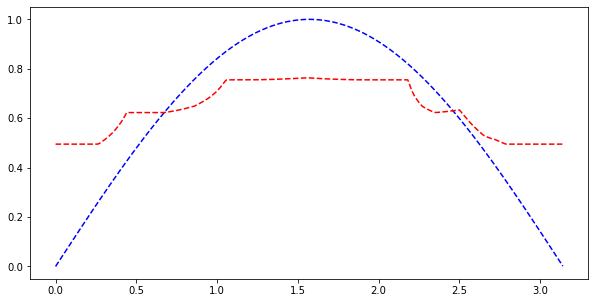

In [49]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result.x, i))
    y_f_sin = np.append(y_f_sin, sin(result.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [20]:
x_in.shape

(315,)

In [45]:
y_f_sin.shape

(315,)

In [31]:
t = np.array([])

In [41]:
t = np.append(t, 9.8, axis = None)
np.append(t, 9)

array([9.8, 9. ])

In [42]:
t

array([9.8])